In [1]:
import requests
import numpy as np
import pandas as pd
import requests,re,io
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [2]:
state_links = {"New York":"https://fred.stlouisfed.org/release/tables?rid=175&eid=267974"}

main_list = []

for key,value in state_links.items():
    res = requests.get(value)
    #print(key)
    html_content = res.text

    tr_tags = re.findall(r'<tr[^>]*>(.*?)</tr>', html_content, re.DOTALL)
    for tr in tr_tags:
        a_tag = re.search(r'<a[^>]*href="(.*?)"[^>]*>(.*?)</a>', tr, re.DOTALL)
        if a_tag:
            baseurl = "https://fred.stlouisfed.org"
            state = key
            county=a_tag.group(2)
            pid = re.search(r'/series/(\w+)', a_tag.group(1)).group(1)
            csv_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id={0}&scale=left&cosd=1969-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-02-10&revision_date=2023-02-10&nd=1969-01-01".format(pid)
            #print(baseurl+a_tag.group(1))
            #download the csv file of each county for a state
            print(state,county,pid)
            res = requests.get(csv_url).content

            df = pd.read_csv(io.StringIO(res.decode('utf-8')))
            # rename the county name 
            df = df.rename(columns={pid:"per_capita_income"})
            
            df['county'] = county
            df['state'] = state
            
            # now combine all the df into one so that for each staate and each county all th pci will be stored
            main_list.append(df)

            
df = pd.concat(main_list,axis=0, ignore_index=True)

df.to_csv("NY_per_county_capita_income.csv") 

New York Albany County PCPI36001
New York Allegany County PCPI36003
New York Bronx County PCPI36005
New York Broome County PCPI36007
New York Cattaraugus County PCPI36009
New York Cayuga County PCPI36011
New York Chautauqua County PCPI36013
New York Chemung County PCPI36015
New York Chenango County PCPI36017
New York Clinton County PCPI36019
New York Columbia County PCPI36021
New York Cortland County PCPI36023
New York Delaware County PCPI36025
New York Dutchess County PCPI36027
New York Erie County PCPI36029
New York Essex County PCPI36031
New York Franklin County PCPI36033
New York Fulton County PCPI36035
New York Genesee County PCPI36037
New York Greene County PCPI36039
New York Hamilton County PCPI36041
New York Herkimer County PCPI36043
New York Jefferson County PCPI36045
New York Kings County PCPI36047
New York Lewis County PCPI36049
New York Livingston County PCPI36051
New York Madison County PCPI36053
New York Monroe County PCPI36055
New York Montgomery County PCPI36057
New Yor

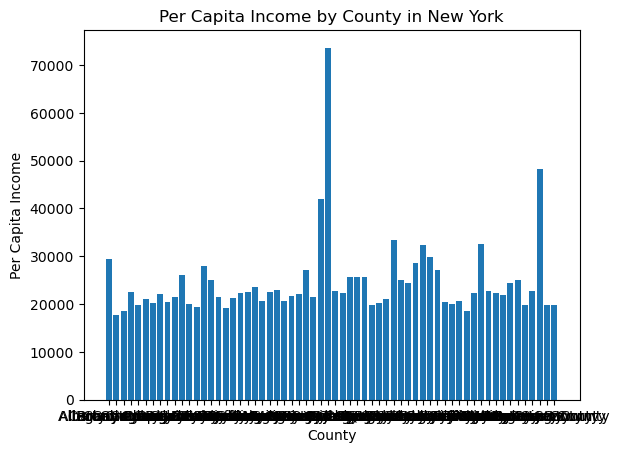

In [3]:
# Group the data by county and state, and compute the mean of per capita income
grouped_df = df.groupby(['county', 'state']).mean().reset_index()

# Plot a bar graph with the mean per capita income of each county
plt.bar(grouped_df['county'], grouped_df['per_capita_income'])

# Add labels and title to the graph
plt.xlabel('County')
plt.ylabel('Per Capita Income')
plt.title('Per Capita Income by County in New York')

# Show the graph
plt.show()


In [4]:
# Send a request to the URL
url = "https://www.health.ny.gov/statistics/vital_statistics/2018/table02.htm"
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the data
table = soup.find("table", {"class": "tablepress"})

# Extract the rows of the table
rows = soup.find_all("tr")

# Create an empty list to store the scraped data
data = []

# Loop over each row of the table
for row in rows:
    # Extract the cells of the row
    cells = row.find_all("td")
    
    # If the row has cells, store the data
    if cells:
        data.append([cell.text.strip() for cell in cells])

# Convert the list of data into a Pandas DataFrame
import pandas as pd
df_land = pd.DataFrame(data)

# Changing the headers for df_land :
df_land.to_csv("NY_per_county_area.csv") 


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("NY_per_county_area.csv")

# Define a dictionary that maps the old header names to the new header names
new_headers = {
    "0": "county",
    "1": "2018 Population Estimate",
    "2": "2010 Census Population",
    "3" : "2010 Land Area Square Miles",
    "4" : "2018 Population Density"
}

# Rename the headers using the `rename` method of the DataFrame
df.rename(columns=new_headers, inplace=True)

# Save the DataFrame back to the CSV file
df.to_csv("NY_per_county_area.csv", index=False)

print(df_land)


                 0           1           2          3          4
0   New York State  19,542,209  19,378,102  47,126.40     414.68
1    New York City   8,398,748   8,175,133     302.65  27,750.70
2            Bronx   1,432,132   1,385,108      42.10  34,017.39
3            Kings   2,582,830   2,504,700      70.82  36,470.35
4         New York   1,628,701   1,585,873      22.83  71,340.39
..             ...         ...         ...        ...        ...
60      Washington      61,197      63,216     831.18      73.63
61           Wayne      90,064      93,772     603.83     149.15
62     Westchester     967,612     949,113     430.50   2,247.65
63         Wyoming      40,085      42,155     592.75      67.63
64           Yates      24,841      25,348     338.14      73.46

[65 rows x 5 columns]
